In [779]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

In [780]:
#First step: Cleaning up US census data

In [781]:
pop = pd.read_csv('statepop.csv', header=1)

In [782]:
pop['Estimates Base'] = pop['Estimates Base'].str.strip('.')

In [783]:
indices = [0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 51,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,]

In [784]:
pop.iloc[8,0] = 'Washington DC'

In [785]:
pop = pop.reindex(indices)

In [786]:
pop.set_index('Estimates Base', inplace=True)

In [787]:
pop.sort_index(inplace=True)

In [788]:
pop.drop(columns=['2016', '2017', '2018', '2019'], inplace=True)

In [789]:
pop.shape

(52, 16)

In [790]:
pop = pop.T

In [791]:
pop = pop.values.flatten()

In [792]:
len(pop)

832

In [793]:
#Second step: drop a few years from my data where there was not reliable census data,
#and drop some rows where there was not reliable census data (Guam, Paula) as well as a
#Multi state row, which cannot be normalized without underlying data that is not accessible

In [794]:
df = pd.read_csv('outbreaks.csv')

In [795]:
df = df.groupby(['Year', 'State']).sum()['Illnesses']

In [796]:
df = df.reset_index()

In [797]:
df.drop(df[df['State'] == 'Guam'].index, inplace=True)

In [798]:
df.drop(df[df['State'] == 'Republic of Palau'].index, inplace=True)

In [799]:
df.drop(df[df['State'] == 'Multistate'].index, inplace=True)

In [800]:
df.drop(df[df['Year'] == 1998].index, inplace=True)

In [801]:
df.drop(df[df['Year'] == 1999].index, inplace=True)

In [802]:
#Third step, make a skeleton dataframe on which to concat my data, so that I can then 
#iterate over segments of data that will have uniform lenghths

In [803]:
states = sorted(df['State'].unique())

In [804]:
len(states)

52

In [805]:
year_list = []
year = 2000
for j in range(2000,2016):
    for i in range(len(states)):
        year_list.append(year)
    year +=1

In [806]:
state_list = []
for i in range(2000,2016):
    for state in states:
        state_list.append(state)

In [807]:
len(state_list)

832

In [808]:
len(year_list)

832

In [809]:
#Fifth step: left merge my data onto skeleton

In [810]:
left = pd.DataFrame(data=[year_list,state_list])

In [811]:
left.shape

(2, 832)

In [812]:
left = left.T

In [813]:
left.shape

(832, 2)

In [814]:
left.rename(columns = {0:'Year', 1:'State'}, inplace=True)

In [815]:
df = left.merge(df, how='left', on=['Year', 'State'])

In [816]:
#Sixth: add population data and normalize

In [817]:
df['Population'] = pd.DataFrame(pop)

In [818]:
df['Illnesses / Population'] = df['Illnesses'] / df['Population']

In [826]:
df = df.fillna(0)

In [ ]:
#Finally, graphs

In [831]:
y_list = []
for state in states:
    y_list.append(df[df['State'] == state]['Illnesses / Population'])

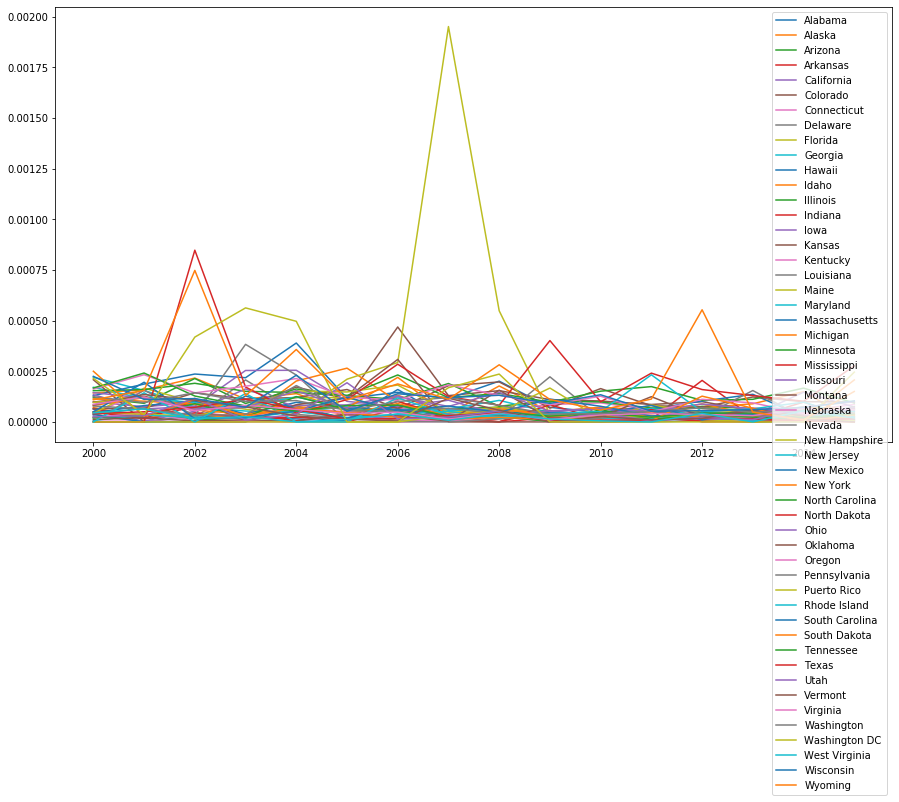

In [833]:
fig,ax=plt.subplots(figsize=(15,8))
for i in range(len(states)):
    ax.plot(range(2000,2016), y_list[i])
plt.legend(states)